# Convolutional Neural Network (CNN)

In this lab we will train a simple Convolutional Neural Network (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html).


### Import TensorFlow library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0




170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

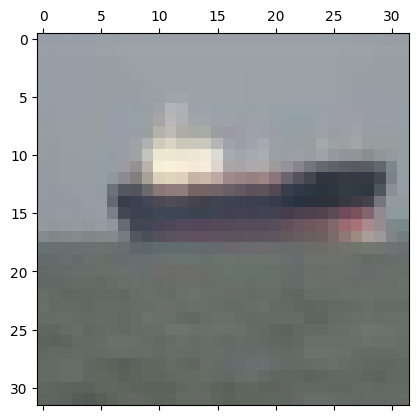

In [ ]:
plt.matshow(train_images[69])

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


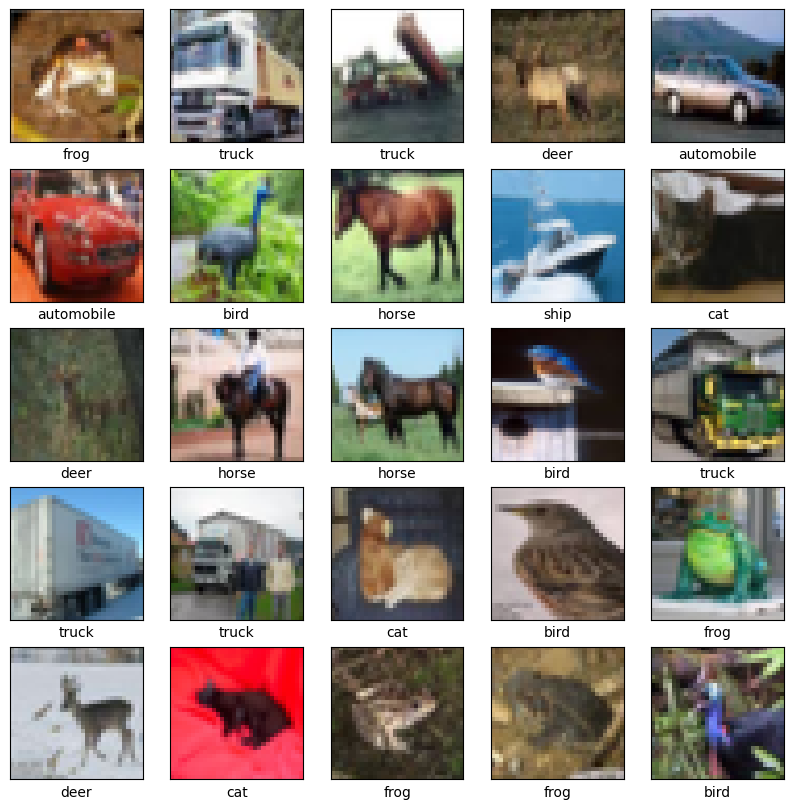

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))

Let's display the architecture of our model so far.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

Here's the complete architecture of our model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

myCNN = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 0.6738 - accuracy: 0.7663 - val_loss: 1.0491 - val_accuracy: 0.6500
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6517 - accuracy: 0.7745 - val_loss: 0.9373 - val_accuracy: 0.6831
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6424 - accuracy: 0.7777 - val_loss: 0.8806 - val_accuracy: 0.7030
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6276 - accuracy: 0.7837 - val_loss: 0.7808 - val_accuracy: 0.7371
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6058 - accuracy: 0.7901 - val_loss: 0.9003 - val_accuracy: 0.6961
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5957 - accuracy: 0.7941 - val_loss: 0.8328 - val_accuracy: 0.7144
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5806 - accuracy: 0.8002 - val_loss: 0.7511 - val_

### Evaluate the model

In [ ]:
type(myCNN)

keras.src.callbacks.History

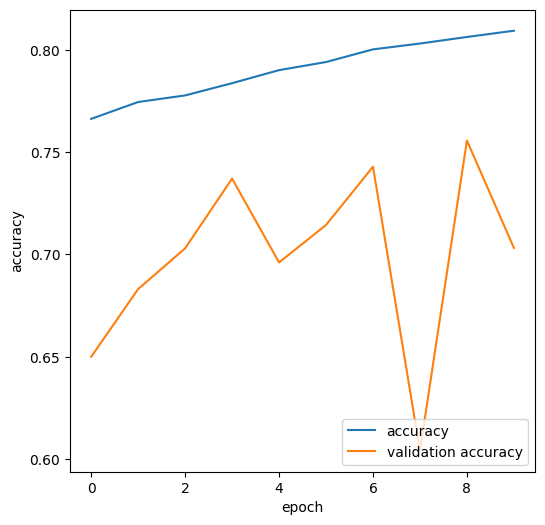

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(myCNN.history['accuracy'],label='accuracy')
plt.plot(myCNN.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

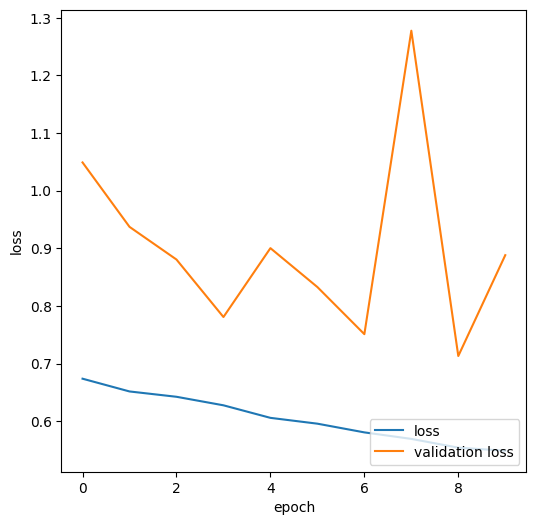

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(myCNN.history['loss'],label='loss')
plt.plot(myCNN.history['val_loss'],label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8882 - accuracy: 0.7032
0.7031999826431274


In [ ]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[569]

array([3.3996855e-03, 4.9018163e-05, 7.0428151e-01, 7.9885498e-03,
       2.5327888e-01, 3.7807910e-04, 3.0317890e-02, 5.9578430e-05,
       2.3219609e-04, 1.4650675e-05], dtype=float32)

In [ ]:
np.argmax(predictions[569])

2

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(class_names[predicted_label])



def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  #thisplot[true_label].set_color('blue')

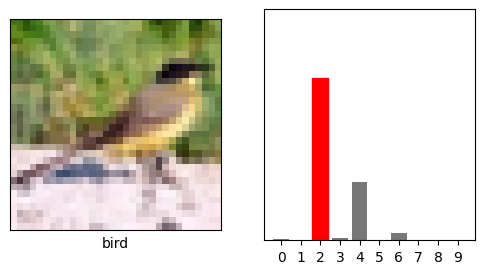

In [ ]:
i = 569
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
test_labels[1000]

array([5], dtype=uint8)